<br>
<br>
# 소스 코드 및 프로그램 실행 단계

- 1단계 : 선수들의 기록을 웹에서 스크래핑하여 csv파일로 만든다. & 모듈 및 클래스를 실행한다.
- 2단계 : 선수 데이터 관람 및 데이터 보기 방식을 설정한다. 
- 3단계 : 두명의 유저의 팀명 선택 및 선수 선택 순서 정하기
- 4단계 : 두명의 유저가 번갈아가며 9명의 선수를 선택한다.
- 5단계 : 라인업(타순)을 설정한다.
- 6단계 : 라인업에 따른 선수 데이터 프레임을 확인한다.
- 7단계 : 각 팀의 선수 정보를 객체로 만들어낸다.
- 8단계 : 경기를 시뮬레이션한다.
- 9단계 : 경기의 충분한 표본 발생시켜 승률을 예측한다. 
- 10단계 : 원 그래프로 예측한 승률 정보를 본다. 

In [5]:
# ------------------0단계--------------------

import requests
from bs4 import BeautifulSoup
import csv
import pandas as pd
import os
import random
import numpy as np
from collections import deque   # 야구장의 베이스상황을 가장 잘 표현할 수 있는 자료구조
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

#---------------------------1단계--------------------------------

# 웹사이트에서 데이터를 스크래핑한다.

# 선수 기록 내용을 담을 csv 파일을 open한다.
f = open( "선수기록.csv", "w", encoding = "utf-8-sig", newline = "") #newline을 사용하면 띄어쓰기를 방지해줌. 
writer= csv.writer(f)

#웹페이지 파싱 & csv파일 만들기
res = requests.get("http://www.statiz.co.kr/stat.php")
soup = BeautifulSoup(res.text, "lxml")
res.raise_for_status()
title ="이름 팀 WAR* G 타석 타수 득점 안타 2타 3타 홈런 루타 타점 도루 도실 볼넷 사구 고4 삼진 병살 희타 희비 타율 출루 장타 OPS wOBA wRC+ WAR WPA".split()
writer.writerow(title)
table = soup.find("table", attrs = {'id' : 'mytable', 'class' : "table" , 'class' : 'table-striped'}).find_all("tr")
row_data = []
dataframe = []

for tr in table:
    tds = tr.find_all("td")
    for idx, td in enumerate(tds):
        if td.find("span") or td.find("a"):
            row_data.append(td.text)
    dataframe.append(row_data)
    row_data = []
            

for idx, data in enumerate(dataframe):
    if ( idx != 0 and idx != 1 and idx != 12 and idx != 13 and idx != 24 and idx != 25):
        writer.writerow(data)
        
f.close()

#-유저클래스-
df = pd.read_csv("선수기록.csv") # csv에서 모든 정보를 가져와서 pd형태로 저장
global players_name 
players_name = list(df["이름"])
global player_info
player_info = df[['이름', '타율', 'WAR*', '타수', '득점', '안타' , '2타' , '3타', '홈런','타점', '도루', '도실', '볼넷', '삼진', '출루', '장타' , 'OPS']]

class User:
    def __init__(self):  #생성자
        self.teamname = ""
        self.lineup = pd.DataFrame(columns=['이름', '타율', 'WAR*', '타수', '득점', '안타' , '2타' , '3타', '홈런','타점', '도루', '도실', '볼넷', '삼진', '출루', '장타' , 'OPS']) 
        self.score = 0
        self.players = []
        self.lineuplist = []
        self.WinCount = 0
        
    def setteam(self):   #팀명설정
        name = ""
        print("팀을 선택하세요.\n두산\nLG\n기아\n롯데\nSK\nKT\n삼성\n키움\nNC\n한화")
        name = input("팀명 : ")
        self.teamname = name
        print()
        
    def scoreup(self):    #팀 스코어 올리기
        self.score = self.score + 1
    
    def selectplayer(self):   #선수 모집
        global players_name
        player = input("선수 입력 : ")
        if player in players_name:
            self.players.append(player)
            players_name.remove(player)
            return 1
        else:
            print("선수명을 잘못 입력하셨거나, 이미 선택된 선수명입니다. 다시 입력해주세요.")
            return 0
    
    def setLineUp(self):
        global player_info
        print(self.teamname + "라인업(타순 설정)")
        print()
        i = 1
        while i < 10:
            player = input(str(i) + "번 타자 : ")
            if player in self.players:
                self.lineup = self.lineup.append([player_info[player_info.이름 == player]], ignore_index = True)
                i += 1
            else:
                print("선수가 선수리스트에 없습니다. 다시 입력해주세요.")
                
        self.lineuplist = list(self.lineup.이름)
        
    def getLineUp(self):
        for i in range(9):
            print(str(i + 1) +"번 " + self.lineuplist[i]) 
        print()
        
    def WinCountUp(self):
        WinCount += 1

#선수 클래스 

class Player:        
    def __init__(self, playerinfo):
        self.playerinfo = playerinfo.copy()  #선수 정보
        self.result = dict()  #타격 결과
        self.location = 0     #선수 베이스 위치
        self.score = 0     #선수가 뽑아낸 스코어
        self.out = False
        
    
    def Getscore(self): #선수 득점
        if self.location >= 4:
            print(self.playerinfo["이름"], " 득점")
            self.location = 0
            self.score += 1
            return 1
        else:
            return 0
    
    def NotPrintGetscore(self): #선수 득점
        if self.location >= 4:
            self.location = 0
            self.score += 1
            return 1
        else:
            return 0
    
    
    def Getname(self): #선수명 get
        return self.playerinfo["이름"]
        
    def walk(self):   #출루상황
        if "1타" in self.result:
            print("1루타!")
            self.location = 1
            return
        elif "2타" in self.result:
            print("2루타!")
            self.location = 2
            return
        elif "3타" in self.result:
            print("3루타!")
            self.location = 3
            return
        elif "홈런" in self.result:
            print("홈런!")
            self.location = 4
            return
        elif "사사구" in self.result:
            print("사사구!")
            self.location = 1
            return
        elif "삼진" in self.result:
            print("삼진아웃!")
            self.location = 0
            self.out = True
            return
        elif "내야아웃(플라이 or 땅볼)" in self.result:
            print("내야아웃(플라이 or 땅볼)!")
            self.out = True
            self.location = 0
            return
        
    def NotPrintwalk(self):   #프린트가 없는 walk함수
        if "1타" in self.result:
            self.location = 1
            return
        elif "2타" in self.result:
            self.location = 2
            return
        elif "3타" in self.result:
            self.location = 3
            return
        elif "홈런" in self.result:
            self.location = 4
            return
        elif "사사구" in self.result:
            self.location = 1
            return
        elif "삼진" in self.result:
            self.location = 0
            self.out = True
            return
        elif "내야아웃(플라이 or 땅볼)" in self.result:
            self.out = True
            self.location = 0
            return
            
    def play(self):  #선수 타격 알고리즘
        B1 = (self.playerinfo['안타'] - self.playerinfo['2타'] - self.playerinfo['3타']) / self.playerinfo['타수']
        B2 = self.playerinfo['2타'] / self.playerinfo['타수']
        B3 = self.playerinfo['3타'] / self.playerinfo['타수']
        HR = self.playerinfo['홈런'] / self.playerinfo['타수']
        BB = self.playerinfo['출루'] - self.playerinfo['타율']
        SO = self.playerinfo['삼진'] / self.playerinfo['타수']
        inout = 1 - B1 - B2 - B3 - HR - BB - SO

        #표준화 과정
        s = 1 / (B1 + B2 + B3 + HR + BB + SO + inout)
        B1 = B1 * s
        B2 = B2 * s
        B3 = B3 * s
        HR = HR * s
        BB = BB * s
        SO = SO * s
        inout = inout * s
        
        array = [B1 , B2, B3, HR , BB, SO , inout]
        select = np.random.choice(7, 1 , p = array)  #비균등 확률 추출
        array[select[0]]
        
        if B1 == array[select[0]]:
            self.result["1타"] = B1
            return
        elif B2 == array[select[0]]:
            self.result["2타"] = B2
            return
        elif B3 == array[select[0]]:
            self.result["3타"] = B3
            return
        elif HR == array[select[0]]:
            self.result["홈런"] = HR
            return
        elif BB == array[select[0]]:
            self.result["사사구"] = BB
            return        
        elif SO == array[select[0]]:
            self.result["삼진"] = SO
            return
        elif inout == array[select[0]]:
            self.result["내야아웃(플라이 or 땅볼)"] = inout
            return        


In [9]:
#----------------2단계-------------------------



 #사용할 스탯만 추출하기

player_info = df[['이름', '타율', 'WAR*', '타수', '득점', '안타' , '2타' , '3타', '홈런','타점', '도루', '도실', '볼넷', '삼진', '출루', '장타' , 'OPS']]

sorted_player_info = player_info.sort_values(by = "타율", ascending = False)

primary_stat = input("선수 기준 스탯 설정\n타율 : 1\nWAR : 2\n득점 : 3\n안타 : 4\n홈런 : 5\n타점 : 6\n도루 : 7\n볼넷 : 8\n출루율 : 9\n장타율 : 10\nOPS : 11\n기준스탯을 입력하세요 : ")

if primary_stat == "1":
    sorted_player_info = player_info.sort_values(by = "타율", ascending = False)
elif primary_stat == "2":
    sorted_player_info = player_info.sort_values(by = "득점", ascending = False)
elif primary_stat == "3":
    sorted_player_info = player_info.sort_values(by = "WAR*", ascending = False) 
elif primary_stat == "4":
    sorted_player_info = player_info.sort_values(by = "안타", ascending = False) 
elif primary_stat == "5":
    sorted_player_info = player_info.sort_values(by = "홈런", ascending = False) 
elif primary_stat == "6":
    sorted_player_info = player_info.sort_values(by = "타점", ascending = False) 
elif primary_stat == "7":
    sorted_player_info = player_info.sort_values(by = "도루", ascending = False) 
elif primary_stat == "8":
    sorted_player_info = player_info.sort_values(by = "볼넷", ascending = False)
elif primary_stat == "9":
    sorted_player_info = player_info.sort_values(by = "출루", ascending = False) 
elif primary_stat == "10":
    sorted_player_info = player_info.sort_values(by = "장타", ascending = False)
elif primary_stat == "11":
    sorted_player_info = player_info.sort_values(by = "OPS", ascending = False)
else:
    print("잘못 입력하셨습니다.")
                     
os.system('cls')
sorted_player_info


선수 기준 스탯 설정
타율 : 1
WAR : 2
득점 : 3
안타 : 4
홈런 : 5
타점 : 6
도루 : 7
볼넷 : 8
출루율 : 9
장타율 : 10
OPS : 11
기준스탯을 입력하세요 : 1


,이름,타율,WAR*,타수,득점,안타,2타,3타,홈런,타점,도루,도실,볼넷,삼진,출루,장타,OPS
4,최형우,0.354,5.70,522,93,185,37,1,28,115,0,0,70,101,0.433,0.590,1.023
9,손아섭,0.352,4.93,540,98,190,43,0,11,85,5,0,61,56,0.415,0.493,0.907
0,로하스,0.349,7.80,550,116,192,39,1,47,135,0,1,65,132,0.417,0.680,1.097
15,박민우,0.345,4.39,467,82,161,27,5,8,63,13,6,36,48,0.402,0.475,0.877
14,페르난데스,0.340,4.41,586,104,199,29,0,21,105,0,1,58,42,0.404,0.497,0.901
5,이정후,0.333,5.64,544,85,181,49,5,15,101,12,2,59,47,0.397,0.524,0.921
24,허경민,0.332,3.56,437,70,145,25,1,7,58,14,6,35,28,0.382,0.442,0.824
6,김현수,0.331,5.32,547,98,181,35,2,22,119,0,2,63,53,0.397,0.523,0.920
11,강백호,0.330,4.76,500,95,165,36,1,23,89,7,2,66,93,0.411,0.544,0.955
2,양의지,0.328,5.95,461,86,151,26,1,33,124,5,2,46,47,0.400,0.603,1.003


In [7]:
#-------------------3단계----------------------
#-랜덤으로 선수 선택 순서정하기-
A = User()
B = User()
print("A 유저님 " , end = "")
A.setteam()
print("B 유저님 " ,end = " ")
B.setteam()

r = random.randrange(1, 3)
print("랜덤 제비 뽑기 결과 :", r) #결과가 1이면 A유저가 먼저 2면 B유저가 먼저 선수를 선택

A 유저님 팀을 선택하세요.
두산
LG
기아
롯데
SK
KT
삼성
키움
NC
한화
팀명 : 두산

B 유저님  팀을 선택하세요.
두산
LG
기아
롯데
SK
KT
삼성
키움
NC
한화
팀명 : 롯데

랜덤 제비 뽑기 결과 : 2


In [8]:
#-----------------------4단계---------------------------

#-선수 선택하기 -
while (len(A.players) < 9) or len(B.players) < 9:
    if r == 1:
        print(A.teamname + "팀  ", end =" ")
        if(A.selectplayer() == 1):
            r = 2
        print()
    elif r == 2:
        print(B.teamname + "팀  ", end =" ")
        if(B.selectplayer() == 1):
            r = 1
        print()

롯데팀   선수 입력 : 로하스

두산팀   선수 입력 : 최형우

롯데팀   선수 입력 : 라모스

두산팀   선수 입력 : 양의지

롯데팀   선수 입력 : 최정

두산팀   선수 입력 : 나성범

롯데팀   선수 입력 : 로맥

두산팀   선수 입력 : 김하성

롯데팀   선수 입력 : 김재환

두산팀   선수 입력 : 강백호

롯데팀   선수 입력 : 김현수

두산팀   선수 입력 : 이정후

롯데팀   선수 입력 : 터커

두산팀   선수 입력 : 페르난데스

롯데팀   선수 입력 : 알테어

두산팀   선수 입력 : 박민우

롯데팀   선수 입력 : 박병호
선수명을 잘못 입력하셨거나, 이미 선택된 선수명입니다. 다시 입력해주세요.

롯데팀   선수 입력 : 이대호
선수명을 잘못 입력하셨거나, 이미 선택된 선수명입니다. 다시 입력해주세요.

롯데팀   선수 입력 : 전준우
선수명을 잘못 입력하셨거나, 이미 선택된 선수명입니다. 다시 입력해주세요.

롯데팀   선수 입력 : 박석민

두산팀   선수 입력 : 홍창기



In [10]:
#-----------------5단계---------------------

#-라인업 보여주기-
A.setLineUp()
print()
B.setLineUp()
print()
A.getLineUp()
print()
B.getLineUp()

두산라인업(타순 설정)

1번 타자 : 홍창기
2번 타자 : 박민우
3번 타자 : 페르난데스
4번 타자 : 최형우
5번 타자 : 양의지
6번 타자 : 강백호
7번 타자 : 김하성
8번 타자 : 나성범
9번 타자 : 이정후

롯데라인업(타순 설정)

1번 타자 : 박석민
2번 타자 : 알테어
3번 타자 : 터커
4번 타자 : 김현수
5번 타자 : 김재환
6번 타자 : 로맥
7번 타자 : 최정
8번 타자 : 라모스
9번 타자 : 로하스

1번 홍창기
2번 박민우
3번 페르난데스
4번 최형우
5번 양의지
6번 강백호
7번 김하성
8번 나성범
9번 이정후


1번 박석민
2번 알테어
3번 터커
4번 김현수
5번 김재환
6번 로맥
7번 최정
8번 라모스
9번 로하스



In [12]:
#------------------A-6단계------------------
A.lineup

,이름,타율,WAR*,타수,득점,안타,2타,3타,홈런,타점,도루,도실,볼넷,삼진,출루,장타,OPS
0,홍창기,0.279,3.94,408,87,114,29,6,5,39,11,5,83,87,0.411,0.417,0.827
1,박민우,0.345,4.39,467,82,161,27,5,8,63,13,6,36,48,0.402,0.475,0.877
2,페르난데스,0.340,4.41,586,104,199,29,0,21,105,0,1,58,42,0.404,0.497,0.901
3,최형우,0.354,5.70,522,93,185,37,1,28,115,0,0,70,101,0.433,0.590,1.023
4,양의지,0.328,5.95,461,86,151,26,1,33,124,5,2,46,47,0.400,0.603,1.003
5,강백호,0.330,4.76,500,95,165,36,1,23,89,7,2,66,93,0.411,0.544,0.955
6,김하성,0.306,6.87,533,111,163,24,1,30,109,23,2,75,68,0.397,0.523,0.921
7,나성범,0.324,5.10,525,115,170,37,2,34,112,3,1,49,148,0.390,0.596,0.987
8,이정후,0.333,5.64,544,85,181,49,5,15,101,12,2,59,47,0.397,0.524,0.921


In [11]:
#------------------B-6단계------------------
B.lineup

,이름,타율,WAR*,타수,득점,안타,2타,3타,홈런,타점,도루,도실,볼넷,삼진,출루,장타,OPS
0,박석민,0.306,4.03,356,58,109,15,0,14,63,0,1,75,62,0.436,0.466,0.902
1,알테어,0.278,4.37,482,90,134,20,7,31,108,22,3,46,149,0.352,0.541,0.893
2,터커,0.306,5.70,542,100,166,40,0,32,113,0,2,76,67,0.398,0.557,0.955
3,김현수,0.331,5.32,547,98,181,35,2,22,119,0,2,63,53,0.397,0.523,0.920
4,김재환,0.266,4.72,515,82,137,26,1,30,113,6,0,91,154,0.374,0.495,0.869
5,로맥,0.282,4.38,485,85,137,32,0,32,91,4,2,91,116,0.399,0.546,0.946
6,최정,0.270,4.91,452,90,122,22,0,33,96,8,3,75,98,0.392,0.538,0.930
7,라모스,0.278,4.37,431,74,120,17,2,38,86,2,0,55,136,0.362,0.592,0.954
8,로하스,0.349,7.80,550,116,192,39,1,47,135,0,1,65,132,0.417,0.680,1.097


In [13]:
#---------------------7단계------------------------

A_order = 0
B_order = 0
A_dict = (A.lineup).to_dict(orient="record") #선수 정보 panda frame -> dict으로 타입캐스트
B_dict = (B.lineup).to_dict(orient="record")

A_player1 = Player(A_dict[0])
A_player2 = Player(A_dict[1])
A_player3 = Player(A_dict[2])
A_player4 = Player(A_dict[3])
A_player5 = Player(A_dict[4])
A_player6 = Player(A_dict[5])
A_player7 = Player(A_dict[6])
A_player8 = Player(A_dict[7])
A_player9 = Player(A_dict[8])

B_player1 = Player(B_dict[0])
B_player2 = Player(B_dict[1])
B_player3 = Player(B_dict[2])
B_player4 = Player(B_dict[3])
B_player5 = Player(B_dict[4])
B_player6 = Player(B_dict[5])
B_player7 = Player(B_dict[6])
B_player8 = Player(B_dict[7])
B_player9 = Player(B_dict[8])

def GetAplayer(n):
    if (n == 1):
        return A_player1
    elif (n==2):
        return A_player2
    elif (n==3):
        return A_player3
    elif (n==4):
        return A_player4
    elif (n==5):
        return A_player5
    elif (n==6):
        return A_player6
    elif (n==7):
        return A_player7
    elif (n==8):
        return A_player8
    elif (n==9):
        return A_player9

def GetBplayer(n):
    if (n == 1):
        return B_player1
    elif (n==2):
        return B_player2
    elif (n==3):
        return B_player3
    elif (n==4):
        return B_player4
    elif (n==5):
        return B_player5
    elif (n==6):
        return B_player6
    elif (n==7):
        return B_player7
    elif (n==8):
        return B_player8
    elif (n==9):
        return B_player9

    

In [21]:
#----------------8단계----------------

#1회 플레이

A.score = 0
B.score = 0
A_order = 1 #타순
B_order = 1 #타순
for i in range(1 , 10):  #1회부터 9회까지
    OutCount = 0
    park = deque([0, 0, 0]) # 야구장을 나타내는 변수, 0은 주자없음을 의미한다.
    print("\n\n",str(i) + "회 " + A.teamname + " 공격\n\n")
    while(OutCount < 3): #아웃카운트가 3개일시에 공수교체
        if A_order == 10:
            A_order = 1
        print(A_order, "번 타자 ",(GetAplayer(A_order).Getname()))
        GetAplayer(A_order).play()
        GetAplayer(A_order).walk()

        if GetAplayer(A_order).location == 1:
            park.appendleft(GetAplayer(A_order))
            if (park[1] != 0):
                park[1].location += 1

            if (park[2] != 0 and type(park[2]) == Player):
                park[2].location += 1

            if (park[3] != 0):
                park[3].location += 1
                if park[3].Getscore():
                    A.scoreup()
                    print(GetAplayer(A_order).Getname() , " 1타점 적시타")
            park.pop()

        elif GetAplayer(A_order).location == 2:
            park.appendleft(GetAplayer(A_order))
            park.appendleft(0) 
            if (park[2] != 0):
                park[2].location += 2

            if (park[3] != 0):
                park[3].location += 2
                if park[3].Getscore():
                    A.scoreup()
            if (park[4] != 0):
                park[4].location += 2
                park[4].Getscore()
                A.scoreup()
            if park[3] and park[4]:
                print(GetAplayer(A_order).Getname() , " 2타점 적시타")
            elif (park[3] == 1 or park[4] == 1):
                print(GetAplayer(A_order).Getname() , " 1타점 적시타")  
            park.pop()
            park.pop()

        elif GetAplayer(A_order).location == 3:
            park.appendleft(GetAplayer(A_order))
            park.appendleft(0)
            park.appendleft(0)

            if (park[3] != 0):
                park[3].location += 3
                if park[3].Getscore():
                    A.scoreup()

            if (park[4] != 0):
                park[4].location += 3
                if park[4].Getscore():
                    A.scoreup()

            if (park[5] != 0):
                park[5].location += 3
                if park[5].Getscore():
                    A.scoreup()

            if (park[3] and park[4] and park[5]):
                print(GetAplayer(A_order).Getname() , " 3타점 적시타")
            elif ((park[3] and park[5]) or (park[4] and park[5])):
                print(GetAplayer(A_order).Getname() , " 2타점 적시타")
            elif (park[3]or park[4] or park[5]):
                print(GetAplayer(A_order).Getname() , " 1타점 적시타")

            park.pop()
            park.pop()
            park.pop()

        elif GetAplayer(A_order).location == 4:
            park.appendleft(GetAplayer(A_order))
            park.appendleft(0)
            park.appendleft(0)
            park.appendleft(0)

            if park[3].Getscore():
                A.scoreup()

            if (park[4] != 0):
                park[4].location += 4
                if park[4].Getscore():
                    A.scoreup()

            if (park[5] != 0):
                park[5].location += 4
                if park[5].Getscore():
                    A.scoreup()

            if (park[6] != 0):
                park[6].location += 4
                if park[6].Getscore():
                    A.scoreup()

            count = 0
            for i in range(3,7):
                if (park[i] != 0):
                    count+= 1

            if (count == 1):
                print(GetAplayer(A_order).Getname() , " 솔로 홈런!!!")
            elif (count == 2):
                print(GetAplayer(A_order).Getname() , " 투런 홈런!!!")
            elif (count == 3):
                print(GetAplayer(A_order).Getname() , " 쓰리런 홈런!!!")              
            elif (count == 4):
                print(GetAplayer(A_order).Getname() , " 만루 홈런!!!")

            park.pop()
            park.pop()
            park.pop()
            park.pop()

        elif GetAplayer(A_order).location == 0:   #타석에 들어선 선수가 진루를 못한 상황이기에 아웃카운트 1증가
            OutCount += 1
        A_order += 1        
        print("-----------------------------------------------------") 
        A_player1 = Player(A_dict[0])
        A_player2 = Player(A_dict[1])
        A_player3 = Player(A_dict[2])
        A_player4 = Player(A_dict[3])
        A_player5 = Player(A_dict[4])
        A_player6 = Player(A_dict[5])
        A_player7 = Player(A_dict[6])
        A_player8 = Player(A_dict[7])
        A_player9 = Player(A_dict[8])

    print("\n\n현재스코어현황")
    print(A.teamname, "\t", B.teamname)
    print(" ",A.score, "\t", B.score, "\n\n")

    OutCount = 0
    park = deque([0, 0, 0]) # 야구장을 나타내는 변수, 0은 주자없음을 의미한다.
    print(str(i) + "회 " + B.teamname + " 공격\n\n")
    while(OutCount < 3): #아웃카운트가 3개일시에 공수교체
        if B_order == 10:
            B_order = 1
        print(B_order, "번 타자 ",(GetBplayer(B_order).Getname()))
        GetBplayer(B_order).play()
        GetBplayer(B_order).walk()

        if GetBplayer(B_order).location == 1:
            park.appendleft(GetBplayer(B_order))
            if (park[1] != 0):
                park[1].location += 1

            if (park[2] != 0 and type(park[2]) == Player):
                park[2].location += 1

            if (park[3] != 0):
                park[3].location += 1
                if park[3].Getscore():
                    B.scoreup()
                    print(GetBplayer(B_order).Getname() , " 1타점 적시타")
            park.pop()

        elif GetBplayer(B_order).location == 2:
            park.appendleft(GetBplayer(B_order))
            park.appendleft(0) 
            if (park[2] != 0):
                park[2].location += 2

            if (park[3] != 0):
                park[3].location += 2
                if park[3].Getscore():
                    B.scoreup()
            if (park[4] != 0):
                park[4].location += 2
                park[4].Getscore()
                B.scoreup()
            if park[3] and park[4]:
                print(GetBplayer(B_order).Getname() , " 2타점 적시타")
            elif (park[3] == 1 or park[4] == 1):
                print(GetBplayer(B_order).Getname() , " 1타점 적시타")  
            park.pop()
            park.pop()

        elif GetBplayer(B_order).location == 3:
            park.appendleft(GetBplayer(B_order))
            park.appendleft(0)
            park.appendleft(0)

            if (park[3] != 0):
                park[3].location += 3
                if park[3].Getscore():
                    B.scoreup()

            if (park[4] != 0):
                park[4].location += 3
                if park[4].Getscore():
                    B.scoreup()

            if (park[5] != 0):
                park[5].location += 3
                if park[5].Getscore():
                    B.scoreup()

            if (park[3] and park[4] and park[5]):
                print(GetBplayer(B_order).Getname() , " 3타점 적시타")
            elif ((park[3] and park[5]) or (park[4] and park[5])):
                print(GetBplayer(B_order).Getname() , " 2타점 적시타")
            elif (park[3]or park[4] or park[5]):
                print(GetBplayer(B_order).Getname() , " 1타점 적시타")

            park.pop()
            park.pop()
            park.pop()

        elif GetBplayer(B_order).location == 4:
            park.appendleft(GetBplayer(B_order))
            park.appendleft(0)
            park.appendleft(0)
            park.appendleft(0)

            if park[3].Getscore():
                B.scoreup()

            if (park[4] != 0):
                park[4].location += 4
                if park[4].Getscore():
                    B.scoreup()

            if (park[5] != 0):
                park[5].location += 4
                if park[5].Getscore():
                    B.scoreup()

            if (park[6] != 0):
                park[6].location += 4
                if park[6].Getscore():
                    B.scoreup()

            count = 0
            for i in range(3,7):
                if (park[i] != 0):
                    count+= 1

            if (count == 1):
                print(GetBplayer(B_order).Getname() , " 솔로 홈런!!!")
            elif (count == 2):
                print(GetBplayer(B_order).Getname() , " 투런 홈런!!!")
            elif (count == 3):
                print(GetBplayer(B_order).Getname() , " 쓰리런 홈런!!!")              
            elif (count == 4):
                print(GetBplayer(B_order).Getname() , " 만루 홈런!!!")

            park.pop()
            park.pop()
            park.pop()
            park.pop()

        elif GetBplayer(B_order).location == 0:   #타석에 들어선 선수가 진루를 못한 상황이기에 아웃카운트 1증가
            OutCount += 1
        B_order += 1        
        print("-----------------------------------------------------") 
        B_player1 = Player(B_dict[0])
        B_player2 = Player(B_dict[1])
        B_player3 = Player(B_dict[2])
        B_player4 = Player(B_dict[3])
        B_player5 = Player(B_dict[4])
        B_player6 = Player(B_dict[5])
        B_player7 = Player(B_dict[6])
        B_player8 = Player(B_dict[7])
        B_player9 = Player(B_dict[8])
    if i != 9:    
        print("\n\n현재스코어현황")
        print(A.teamname, "\t", B.teamname)
        print(" ",A.score, "\t", B.score)
    else:
        print("\n\n경기종료\n최종스코어\n")
        print(A.teamname, "\t", B.teamname)
        print(" ",A.score, "\t", B.score)
        if A.score > B.score:
            print("!!!!!!!!!!!!!",A.teamname, " 승","!!!!!!!!!!!!!")
        elif A.score < B.score:
            print("!!!!!!!!!!!!!", B.teamname, " 승", "!!!!!!!!!!!!!")
        else:
            print("무승부")



 1회 두산 공격


1 번 타자  홍창기
삼진아웃!
-----------------------------------------------------
2 번 타자  박민우
내야아웃(플라이 or 땅볼)!
-----------------------------------------------------
3 번 타자  페르난데스
내야아웃(플라이 or 땅볼)!
-----------------------------------------------------


현재스코어현황
두산 	 롯데
  0 	 0 


1회 롯데 공격


1 번 타자  박석민
내야아웃(플라이 or 땅볼)!
-----------------------------------------------------
2 번 타자  알테어
삼진아웃!
-----------------------------------------------------
3 번 타자  터커
삼진아웃!
-----------------------------------------------------


현재스코어현황
두산 	 롯데
  0 	 0


 2회 두산 공격


4 번 타자  최형우
2루타!
-----------------------------------------------------
5 번 타자  양의지
홈런!
양의지  득점
최형우  득점
양의지  투런 홈런!!!
-----------------------------------------------------
6 번 타자  강백호
1루타!
-----------------------------------------------------
7 번 타자  김하성
1루타!
-----------------------------------------------------
8 번 타자  나성범
내야아웃(플라이 or 땅볼)!
-----------------------------------------------------
9 번 타자  이정후
1루타!
---------------------------

In [22]:
#-----------------9단계--------------------

# 승리 확률 계산

GameCount = int(input("진행 시킬 경기 횟수를 입력하세요.:"))
Acount = 0
Bcount = 0
tie = 0

for i in range(GameCount):
    A.score = 0
    B.score = 0
    A_order = 1 #타순
    B_order = 1 #타순
    for i in range(1 , 10):  #1회부터 9회까지
        OutCount = 0
        park = deque([0, 0, 0]) # 야구장을 나타내는 변수, 0은 주자없음을 의미한다.
        while(OutCount < 3): #아웃카운트가 3개일시에 공수교체
            if A_order == 10:
                A_order = 1
            GetAplayer(A_order).play()
            GetAplayer(A_order).NotPrintwalk()

            if GetAplayer(A_order).location == 1:
                park.appendleft(GetAplayer(A_order))
                if (park[1] != 0):
                    park[1].location += 1

                if (park[2] != 0 and type(park[2]) == Player):
                    park[2].location += 1

                if (park[3] != 0):
                    park[3].location += 1
                    if park[3].NotPrintGetscore():
                        A.scoreup()
                park.pop()

            elif GetAplayer(A_order).location == 2:
                park.appendleft(GetAplayer(A_order))
                park.appendleft(0) 
                if (park[2] != 0):
                    park[2].location += 2

                if (park[3] != 0):
                    park[3].location += 2
                    if park[3].NotPrintGetscore():
                        A.scoreup()
                if (park[4] != 0):
                    park[4].location += 2
                    park[4].NotPrintGetscore()
                    A.scoreup()
                park.pop()
                park.pop()

            elif GetAplayer(A_order).location == 3:
                park.appendleft(GetAplayer(A_order))
                park.appendleft(0)
                park.appendleft(0)

                if (park[3] != 0):
                    park[3].location += 3
                    if park[3].NotPrintGetscore():
                        A.scoreup()

                if (park[4] != 0):
                    park[4].location += 3
                    if park[4].NotPrintGetscore():
                        A.scoreup()

                if (park[5] != 0):
                    park[5].location += 3
                    if park[5].NotPrintGetscore():
                        A.scoreup()
                park.pop()
                park.pop()
                park.pop()

            elif GetAplayer(A_order).location == 4:
                park.appendleft(GetAplayer(A_order))
                park.appendleft(0)
                park.appendleft(0)
                park.appendleft(0)

                if park[3].NotPrintGetscore():
                    A.scoreup()

                if (park[4] != 0):
                    park[4].location += 4
                    if park[4].NotPrintGetscore():
                        A.scoreup()

                if (park[5] != 0):
                    park[5].location += 4
                    if park[5].NotPrintGetscore():
                        A.scoreup()

                if (park[6] != 0):
                    park[6].location += 4
                    if park[6].NotPrintGetscore():
                        A.scoreup()

                park.pop()
                park.pop()
                park.pop()
                park.pop()

            elif GetAplayer(A_order).location == 0:   #타석에 들어선 선수가 진루를 못한 상황이기에 아웃카운트 1증가
                OutCount += 1
            A_order += 1        
            A_player1 = Player(A_dict[0])
            A_player2 = Player(A_dict[1])
            A_player3 = Player(A_dict[2])
            A_player4 = Player(A_dict[3])
            A_player5 = Player(A_dict[4])
            A_player6 = Player(A_dict[5])
            A_player7 = Player(A_dict[6])
            A_player8 = Player(A_dict[7])
            A_player9 = Player(A_dict[8])
        

        OutCount = 0
        park = deque([0, 0, 0]) # 야구장을 나타내는 변수, 0은 주자없음을 의미한다.
        
        while(OutCount < 3): #아웃카운트가 3개일시에 공수교체
            if B_order == 10:
                B_order = 1
            GetBplayer(B_order).play()
            GetBplayer(B_order).NotPrintwalk()

            if GetBplayer(B_order).location == 1:
                park.appendleft(GetBplayer(B_order))
                if (park[1] != 0):
                    park[1].location += 1

                if (park[2] != 0 and type(park[2]) == Player):
                    park[2].location += 1

                if (park[3] != 0):
                    park[3].location += 1
                    if park[3].NotPrintGetscore():
                        B.scoreup()
                park.pop()

            elif GetBplayer(B_order).location == 2:
                park.appendleft(GetBplayer(B_order))
                park.appendleft(0) 
                if (park[2] != 0):
                    park[2].location += 2

                if (park[3] != 0):
                    park[3].location += 2
                    if park[3].NotPrintGetscore():
                        B.scoreup()
                if (park[4] != 0):
                    park[4].location += 2
                    park[4].NotPrintGetscore()
                    B.scoreup()
                park.pop()
                park.pop()

            elif GetBplayer(B_order).location == 3:
                park.appendleft(GetBplayer(B_order))
                park.appendleft(0)
                park.appendleft(0)

                if (park[3] != 0):
                    park[3].location += 3
                    if park[3].NotPrintGetscore():
                        B.scoreup()

                if (park[4] != 0):
                    park[4].location += 3
                    if park[4].NotPrintGetscore():
                        B.scoreup()

                if (park[5] != 0):
                    park[5].location += 3
                    if park[5].NotPrintGetscore():
                        B.scoreup()
                park.pop()
                park.pop()
                park.pop()

            elif GetBplayer(B_order).location == 4:
                park.appendleft(GetBplayer(B_order))
                park.appendleft(0)
                park.appendleft(0)
                park.appendleft(0)

                if park[3].NotPrintGetscore():
                    B.scoreup()

                if (park[4] != 0):
                    park[4].location += 4
                    if park[4].NotPrintGetscore():
                        B.scoreup()

                if (park[5] != 0):
                    park[5].location += 4
                    if park[5].NotPrintGetscore():
                        B.scoreup()

                if (park[6] != 0):
                    park[6].location += 4
                    if park[6].NotPrintGetscore():
                        B.scoreup()


                park.pop()
                park.pop()
                park.pop()
                park.pop()

            elif GetBplayer(B_order).location == 0:   #타석에 들어선 선수가 진루를 못한 상황이기에 아웃카운트 1증가
                OutCount += 1
            B_order += 1        
            B_player1 = Player(B_dict[0])
            B_player2 = Player(B_dict[1])
            B_player3 = Player(B_dict[2])
            B_player4 = Player(B_dict[3])
            B_player5 = Player(B_dict[4])
            B_player6 = Player(B_dict[5])
            B_player7 = Player(B_dict[6])
            B_player8 = Player(B_dict[7])
            B_player9 = Player(B_dict[8])
            
    if (A.score > B.score):
        Acount+= 1
    elif (A.score < B.score):
        Bcount+= 1
    else:
        tie += 1
        
    A.score = 0
    B.score = 0
print(A.teamname + "승리 횟수" , Acount)
print(B.teamname + "승리 횟수" , Bcount)
print("무승부 횟수" , tie)

진행 시킬 경기 횟수를 입력하세요.:1000
두산승리 횟수 396
롯데승리 횟수 548
무승부 횟수 56


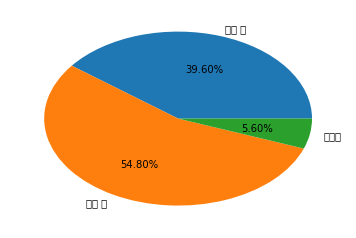

In [23]:
#-----------------------10단계-----------------------

ratio = [Acount, Bcount, tie]
labels = [A.teamname + " 승", B.teamname + " 승", "무승부"]
plt.pie(ratio, labels=labels, autopct='%.2f%%')
plt.show()